# Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
np.random.seed(0)

In [4]:
df = pd.read_parquet("../data/df.parquet")

In [5]:
y = df["sale_price"]
df.drop(columns=['sale_price'], inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.25)

# Fitting the model

In [6]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

MAE = []
MSE = []
R2 = []

n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_test, y_test, replace=True)
    # make predictions
    y_hat = linear_regressor.predict(X_bs)
    # evaluate model
    mae = mean_absolute_error(y_bs, y_hat)
    mse = mean_squared_error(y_bs, y_hat)
    r2 = r2_score(y_bs, y_hat)
    MAE.append(mae)
    MSE.append(mse)
    R2.append(r2)

print('Bootstrapped Test MAE: ' + str(np.mean(MAE)))
print('Bootstrapped Test MSE: ' + str(np.mean(MSE)))
print('Bootstrapped Test R2: ' + str(np.mean(R2)))

Bootstrapped Test MAE: 38810.670827867645
Bootstrapped Test MSE: 2239339461.6792264
Bootstrapped Test R2: 0.9748218952464511


# Graphs for bootstrapping samples

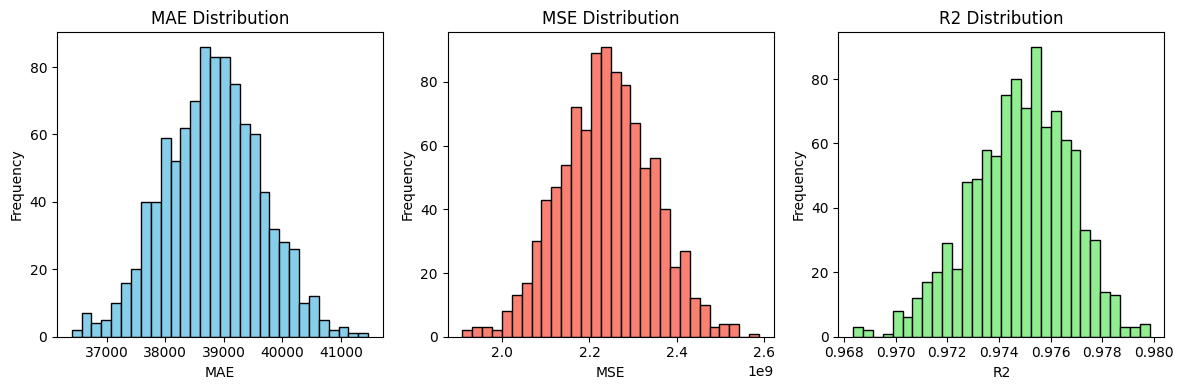

In [7]:
# Plot histograms of bootstrapped metrics
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(MAE, bins=30, color='skyblue', edgecolor='black')
plt.title('MAE Distribution')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(MSE, bins=30, color='salmon', edgecolor='black')
plt.title('MSE Distribution')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(R2, bins=30, color='lightgreen', edgecolor='black')
plt.title('R2 Distribution')
plt.xlabel('R2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
y_pred=linear_regressor.predict(X_test)

# Model Evaluation on Test Set

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mae

38784.60834236941

In [10]:
mse = mean_squared_error(y_test, y_pred)
mse

2237708811.264606

In [11]:
r2 = r2_score(y_test, y_pred)
r2

0.974999813166619

# Graphs (Expected Value vs Actual Data)

In [12]:
import matplotlib.pyplot as plt

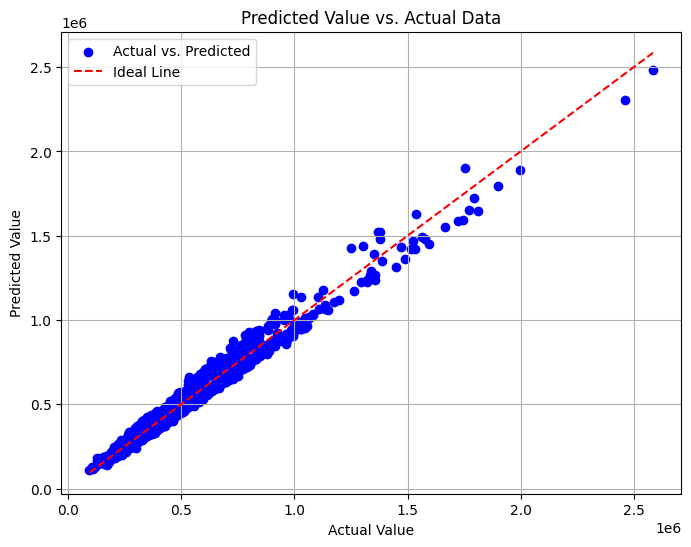

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Predicted Value vs. Actual Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

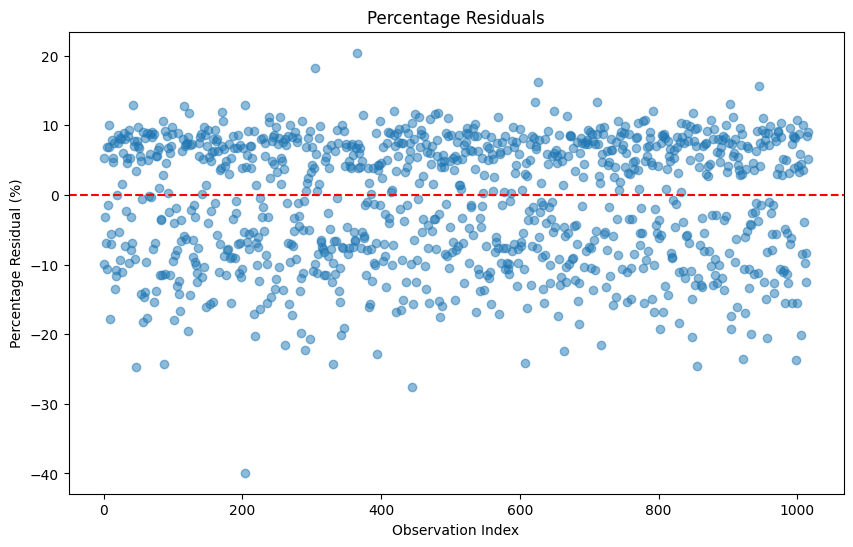

In [14]:
# Calculate percentage residuals: (Actual - Predicted) / Actual * 100
percentage_residuals = ((y_test - y_pred) / y_test) * 100

# Plotting percentage residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(percentage_residuals)), percentage_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Percentage Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Percentage Residual (%)')
plt.show()

# Saving best model

In [15]:
import pickle

pickle.dump(linear_regressor, open("../linear_model.pickle", "wb"))